# <center> 🦖 🦄 Зоопарк `open-source` моделей 🐲 🐢 </center>
### <center> 🕵️‍♂️ Найди "зверя" по душе 🦙 </center>

### Оглавление ноутбука
<img src='../images/llamas.jpeg' align="right" width="350" height="478" >
<br>

<p><font size="3" face="Arial" font-size="large"><ul type="square">
    
<li><a href="#p1">📥 Foundation модели - начнём с "базы".</a></li>
<li><a href="#p2">❓ Выбираем модель под задачу! 🤌🏻</a></li><ul type="square">
<li><a href="#p2.1">⚾️ Базовые модели (base) 🧢</a></li>
<li><a href="#p2.2">💬 Чат-модели (chat) 💬</a></li>
<li><a href="#p2.3">📝 Instruct модели ❓</a></li>
<li><a href="#p2.4">💻 Код-модели (code) 👨🏻‍💻</a></li>
<li><a href="#p2.5">🛋 Бенчмарки 💶</a></li></ul>
<li><a href="#p3">🎛 Выбор модели под ресурсы 🪫</a></li><ul type="square">
<li><a href="#p3.1">🚀 Ускорение инференса - Mixture of Experts (MOE) 👨‍👨‍👦‍👦</a></li></ul>
<li><a href="#p4">🪆 Модели для русского языка 👅</a></li>
<li><a href="#p5">📝 Мультимодальные модели 🎶</a></li>
<li><a href="#p6">😵‍💫 Лицензии 🪪</a></li>
<li><a href="#p7">✌🏼 Заключение 📤</a></li>


    
</ul></font></p>

### 🧑‍🎓 В этом уроке: 

* Изучим открытые альтернативы проприетарным моделям
* Попробуем разобраться, как из множества выбрать подходящую
* Как их использовать с `LangChain`.
* Так же научимся разбираться в этих страшных названиях моделей с HF: <br>
<img src='../images/mcsft.png' align="left" width="500" height="428" > <img src='../images/unsloth.png' align="center" width="500" height="428" >
<br>

Если вы уже можете расшифровать все аббревиатуры из названий модели, то можете бегло просмотреть примеры с кодом!

# <center id="p1"> 📥 Foundation модели - начнём с "базы". </center>

<div class="alert alert-info">

В каталоге моделей **[HuggingFace](https://huggingface.co/models?pipeline_tag=text-generation&sort=downloads)** только для генерации текста сейчас доступны почти **100 000** опенсорсных нейронок. Но это не самостоятельные проекты — большинство из них разработаны на базе нескольких LLM, называемых базовыми моделями (**foundation models**).

Создание и обучение такой модели требует больших финансовых затрат и вычислительных мощностей. Поэтому работа над ними доступна только крупным IT-компаниям: `Google`, `OpenAI`, `Meta` и другим. Например, обучение `GPT-3` обошлось разработчикам почти в 5 млн долларов. Благодаря тому, что некоторые из них выпущены под открытой лицензией, затраты на их дообучение и внедрение снижаются. Например, доработка и запуск опенсорсных `Alpaca` и `Vicuna-13B`, основанных на модели `LLaMA`, обошлись разработчикам всего лишь в 600 и 300 долларов соответственно.

<div class="alert alert-info">

Поэтому именно с опенсорсными LLM часто работают стартапы. Такие модифицированные модели называют форками (`forks`).

<div class="alert alert-success">

Например, к популярным базовым моделям, ставших основой для открытых LLM, относят:


<img src='../images/models-colorgrey.jpg' align="right" width="450" height="528">


* Семейство `LLaMA` от Meta.
* Модели семейства `Mistral` от французской MistralAI, построены на базе `LLAMA`.
* Модели `Phi` от Microsoft, `Phi-2` тоже на базе `LLAMA`.
* Семейства моделей `Т5` и `Gemma` от компании Google.
* `BLOOM` от проекта BigScience, созданного при участии компании Hugging Face.
* `GPT-2` - модель от OpenAI, выпущенная несколько лет назад, когда компания планировала разрабатывать только open-source решения.
* `Falcon` — разработка от Института технологических инноваций (TII) из Абу-Даби (ОАЭ).
* И некоторые другие

<div class="alert alert-success">
    
На иллюстрации (обновляемый [источник](https://github.com/Mooler0410/LLMsPracticalGuide/blob/main/imgs/tree.jpg)) можно увидеть генеалогическое дерево моделей и их вендоров <br>
Закрашенные прямоугольники - `Open-source` <br>

# <center id="p2"> Как же выбрать подходяющую модель под задачу? 🤔 </center>
<div class="alert alert-info">

Нет такой модели, которая бы подходила на все случаи жизни, практически каждый день обновляются старые или появляются новые, чтобы мы сейчас не посоветовали - очень скоро это станет неактуально. <br>
Давайте рассмотрим критерии выбора модели:

<div class="alert alert-success">

1. **Задача** - какую задачу должна решать модель
   * Подойдёт претрейн или надо искать специально зафайнтюненную версию (чат, инстракт, код)?
   * Какая самая точная - рейтинги, бэнчмарки?
2. **Ресурсы** - какие ресурсы имеем в распоряжении (CPU, GPU, RAM)
   * Контекстное окно - сколько данных сможет принимать на вход?
   * Какая должна быть скорость инференса (получения ответа)?
   * Надо ли использовать квантизованную версию модели?
3. **Язык** - на скольких языках модель должна отвечать?
   * Мультиязычная
   * Один язык, популярный или редкий
4. **Модальность** - что модель должна уметь анализировать?
   * Только текст
   * Многомодальная (тексты, изображения, звук)
5. **Лицензия** - какие ограничения наложены на модель для коммерческого и частного использования.

Теперь пройдёмся подробнее по каждому пункту!

# <center> ❓ Выбираем модель под задачу! 🤌🏻 </center>

<div class="alert alert-info">

Чаще всего компании выкладывают в открытый доступ так называемые "претрейны" (предобученные версии своих моделей). Но использовать такие модели для решения каких-либо реальных задач проблематично, так как в результате у нейронок формируется лишь общее понимание языка. И она может генерировать только продолжение введенного пользователем текста (большинство базовых моделей).

Поэтому популярностью пользуются не претрейны, а версии (форки) базовых моделей прошедшие дополнительную тонкую настройку ("файн-тюнинг" - о нём подробнее в следующем уроке) под решение конкретной задачи. И именно таких "зафайнтюненных" версий мы можем видеть десятки тысяч на HuggingFace.

<div class="alert alert-success">

Чтобы найти такую модель, надо посмотреть на её название - в названии такой LLM, как правило, должно встречаться:
* **`Chat`** - модель дообучили для ведения диалога, тренируется на диалоговых данных.
* **`Instruct`** - обучена выполнять и следовать инструкциям, тренировались на парах инструкия - ответ.
* **`Code`** - дообучена анализировать и писать программный код (иногда в названии встречается конкретный язык программирования)
* **`Math`, `Arithmetic`** - может решать математические и логические задачи (иногда в названии присутствует корпус заданий, на котором проводилось дообучение)
* И много других специфических, под биологию, химию, суммаризацию и.т.д. Например, у модели `MPT-7B` есть версия `StoryWriter`, которая специализируется на написании вымышленных историй с очень длинным контекстом.

Давайте попробуем найти и позапускать такие модели c **Langchain**. 

### <center id="p2.1"> ⚾️ Базовые модели (base) - кто отец? 🧢 </center>

In [ ]:
!pip install xformers sentencepiece peft trl accelerate bitsandbytes llama-cpp-python langchain langchain_community --upgrade -qq

In [1]:
from transformers import pipeline, AutoModelForCausalLM, AutoTokenizer
from langchain.llms import HuggingFacePipeline

In [ ]:
# Возьмём для примера GPT-2
model = AutoModelForCausalLM.from_pretrained("openai-community/gpt2")
tokenizer = AutoTokenizer.from_pretrained("openai-community/gpt2")
pipe = pipeline('text-generation', device=0, model=model, tokenizer=tokenizer)

llm = HuggingFacePipeline(pipeline=pipe)

In [3]:
# Спросим что-нибудь
print(llm.invoke('Who is Ronaldo?'))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Who is Ronaldo?

So, the story, you know, let's look at the world of football. Obviously, we are starting to get a better glimpse into how the game has changed and what really happens.

First of all,


<div class="alert alert-success">

🤬 Видим, что модель продолжает какой-то текст и на вопрос не отвечает. <br>
Попробуем с промптом:

In [3]:
from langchain.prompts import PromptTemplate

template = """Question: {question}.

Answer:"""

prompt = PromptTemplate(template=template, input_variables=["question"])

llm_chain = prompt | llm
question = "Who is Ronaldo?"

print(llm_chain.invoke(question))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Question: Who is Ronaldo?.

Answer: The Brazil national team star has been a regular part of the team as they look to secure a place in the World Cup 2018 quarter-final against Mexico.

Asked by reporters whether he had


<div class="alert alert-success">

🤬 Тоже особо не помогло. <br> 
Попробуем другую модель, обученную только на данных из интернета - `Falcon-rw` 

In [2]:
model = AutoModelForCausalLM.from_pretrained("tiiuae/falcon-rw-1b")
tokenizer = AutoTokenizer.from_pretrained("tiiuae/falcon-rw-1b")
pipe = pipeline('text-generation', device=0, model=model, tokenizer=tokenizer)

llm = HuggingFacePipeline(pipeline=pipe)

/home/jovyan/venvs/sinara/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [6]:
# Спрашиваем
print(llm.invoke('Who is Ronaldo?'))

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
/home/jovyan/venvs/sinara/lib/python3.10/site-packages/transformers/generation/utils.py:1132: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Who is Ronaldo?
Ronaldo is a Portuguese footballer who plays as a striker for the Spanish club


<div class="alert alert-success">

🤬 Модель отвечает что-то осмысленное, но обрывается на полуслове. Если посмотреть на **warning**, то видно, что параметр `max_length` по умолчанию равен 20 и обрывает генерацию.

Для регулирования длины генерации используется один из 2-х параметров: `max_length` или `max_new_tokens` (рекомендуется) - в обоих параметрах учитывается сумма токенов в запросе и генерации.

In [2]:
# Попробуем с max_new_tokens
model = AutoModelForCausalLM.from_pretrained("tiiuae/falcon-rw-1b")
tokenizer = AutoTokenizer.from_pretrained("tiiuae/falcon-rw-1b")

/home/jovyan/venvs/sinara/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [3]:
pipe = pipeline('text-generation', device=0,
                model=model, tokenizer=tokenizer,
               max_new_tokens=150,)

llm = HuggingFacePipeline(pipeline=pipe)

In [4]:
# Спрашиваем
print(llm.invoke('who is Ronaldo?'))

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


who is Ronaldo?
Ronaldo is a Portuguese footballer who plays as a striker for the Spanish club Real Madrid and the Italian club Juventus. He is the current world’s most expensive footballer, with a transfer fee of €100 million.
Ronaldo is the most expensive player in the world, with a transfer fee of €100 million.
Ronaldo is the most expensive player in the world, with a transfer fee of €100 million.
Ronaldo is the most expensive player in the world, with a transfer fee of €100 million.
Ronaldo is the most expensive player in the world, with a transfer fee of €100 million.
Ronaldo is the most expensive player in the world, with a transfer fee of €100 million.


<div class="alert alert-info">

Видим, что выдав ответ, модель не прекращает работу и продолжает генерацию повторами, пока не израсходует весь лимит токенов, указанный в параметре. Либо, если модель умнее, то она продолжит генерировать текст по теме, пока не закончится лимит токенов.

<div class="alert alert-success">

Для таких случаев используют параметры:
* `repetition_penalty` - по умолчанию 1, что значит без штрафа.
* `stop_strings` - строку или список строк, по которым генерация будет остановлена. (поддерживается не всеми моделями).
* `stopping_criteria` - принимает объект класса `StoppingCriteriaList`, в котором можно закодить сложный критерий остановки
* Или указывают `eos_token_id` - `id` токена по которому закончить генерацию. (Например, по символу `.`)

In [23]:
# Попробуем с repetition_penalty
pipe = pipeline('text-generation', device=0, model=model, tokenizer=tokenizer,
               max_new_tokens=150,
               repetition_penalty=2.0)

llm = HuggingFacePipeline(pipeline=pipe)

In [25]:
# Спрашиваем
print(llm.invoke('who is Ronaldo?'))

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


who is Ronaldo?
Ronaldo, the Portuguese soccer star who has been called “the best player in history” by many and a national hero. He was born on July 5th 1981 to parents of modest means but he grew up with an incredible talent for football that would eventually lead him into becoming one if not THE greatest footballer ever! His father died when his mother remarried so young (he had only just turned 10) leaving little behind except some memories from childhood days spent playing around their home town at local parks or fields where they were surrounded mostly kids like himself growing older as well…and then there are those moments you remember forever such being able play against your idol Lionel Messi back during my youth years which I still have vivid images about even now


<div class="alert alert-success">

🤬 Модель перестала сыпать повторы, но всё равно генерирует на все токены. <br>
Поставим ограничение, чтобы генерация обрывалась росле первого предложения, по символу `.`

In [5]:
# Укажем eos_token
terminators = [tokenizer.eos_token_id, tokenizer.convert_tokens_to_ids(".")]

pipe = pipeline('text-generation', device=0,
                model=model,
                tokenizer=tokenizer,
                max_new_tokens=150,
               #repetition_penalty=2.0,
                eos_token_id=terminators,)

llm = HuggingFacePipeline(pipeline=pipe)

In [6]:
# Спрашиваем
print(llm.invoke('who is Ronaldo?'))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


who is Ronaldo?
Ronaldo is a Portuguese footballer who plays as a striker for the Spanish club Real Madrid and the Italian club Juventus.


<div class="alert alert-success">

🥳 Получилось добиться желаемого результата.

<div class="alert alert-info">
    
Мы рассмотрели только несколько параметров пайплайна инициализиции моделей, так же можно указывать уже знакомые нам `temperature`, `top_k`. С полным списком можете ознакомиться по [ссылке](https://huggingface.co/docs/transformers/main_classes/text_generation).

**ВАЖНО:** Некоторые модели могут поддерживать не все параметры пайплайна

<div class="alert alert-success">

Попробуем дать базовой модели промпт в виде диалога.

In [7]:
prompt = '''
Who is Ronaldo?
Ronaldo is a Portuguese footballer who plays as a striker for the Spanish club Real Madrid and the Italian club Juventus.
What kind of sport he plays?
'''

In [8]:
print(llm.invoke(prompt))

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Who is Ronaldo?
Ronaldo is a Portuguese footballer who plays as a striker for the Spanish club Real Madrid and the Italian club Juventus.
What kind of sport he plays?
Ronaldo is a striker who plays for Real Madrid and Juventus.


<div class="alert alert-success">

Видим, что модель не понимает, что это диалог и продолжает отвечать, кто такой Роналдо.

### <center id="p2.2"> 💬 Чат-модели (chat) - для диалоговых систем 💬 </center>

<img src='../images/chat.png' align="right" width="450" height="528">

<div class="alert alert-info">

Обучены на диалоговых данных, могут поддерживать контекст диалога.

In [6]:
# Попробуем Qwen1.5-Chat
model = AutoModelForCausalLM.from_pretrained("Qwen/Qwen1.5-1.8B-Chat")
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen1.5-1.8B-Chat")

pipe = pipeline('text-generation', device=0,
                model=model, tokenizer=tokenizer, max_new_tokens=150)

llm = HuggingFacePipeline(pipeline=pipe)

/home/jovyan/venvs/sinara/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [10]:
# Спрашиваем
print(llm.invoke(prompt))


Who is Ronaldo?
Ronaldo is a Portuguese footballer who plays as a striker for the Spanish club Real Madrid and the Italian club Juventus.
What kind of sport he plays?
Ronaldo is an elite professional athlete who primarily specializes in soccer, also known as football. He has played professionally at both the highest level of international competition (UEFA Champions League) and the domestic leagues in Spain and Italy.
Ronaldo's success on the field dates back to his early career with Sporting CP in Portugal, where he established himself as one of the top players in the country. In 2004, he joined Real Madrid, where he went on to become their all


<div class="alert alert-success">

Модель отвечает, но так же продолжает генерировать ответ пока не достигнет лимита токенов. <br>
Попробуем дать чат-модели текст из википедии и попросим проделать с ним разные действия.

In [3]:
text = '''
Cristiano Ronaldo dos Santos Aveiro is a Portuguese professional footballer who plays as a forward and captains 
both Saudi Pro League club Al Nassr and the Portugal national team. Widely regarded as one of the greatest players 
of all time, Ronaldo has won five Ballon d'Or awards, a record three UEFA Men's Player of the Year Awards, and four 
European Golden Shoes, the most by a European player. He has won 33 trophies in his career, including seven league titles,
five UEFA Champions Leagues, the UEFA European Championship and the UEFA Nations League. Ronaldo holds the records 
for most appearances (183), goals (140) and assists (42) in the Champions League, goals in the European Championship (14),
international goals (128) and international appearances (206). He is one of the few players to have made over 1,200 
professional career appearances, the most by an outfield player, and has scored over 890 official senior career goals 
for club and country, making him the top goalscorer of all time.
'''

In [5]:
template = """Summarize this text by one sentence: {text}

Summary:"""

prompt = PromptTemplate(template=template, input_variables=["text"])
llm_chain = prompt | llm

print(llm_chain.invoke(text))

Summarize this text by one sentence: 
Cristiano Ronaldo dos Santos Aveiro is a Portuguese professional footballer who plays as a forward and captains 
both Saudi Pro League club Al Nassr and the Portugal national team. Widely regarded as one of the greatest players 
of all time, Ronaldo has won five Ballon d'Or awards, a record three UEFA Men's Player of the Year Awards, and four 
European Golden Shoes, the most by a European player. He has won 33 trophies in his career, including seven league titles,
five UEFA Champions Leagues, the UEFA European Championship and the UEFA Nations League. Ronaldo holds the records 
for most appearances (183), goals (140) and assists (42) in the Champions League, goals in the European Championship (14),
international goals (128) and international appearances (206). He is one of the few players to have made over 1,200 
professional career appearances, the most by an outfield player, and has scored over 890 official senior career goals 
for club and count

<div class="alert alert-success">

Модель справилась с задачей, но не выполнила инструкцию дать ответ одним предложением.

In [10]:
template = """Answer the question based on the text below. Answer by number only.
Text: {text}
Question: {question}.

Answer:"""

prompt = PromptTemplate(template=template, input_variables=["text", "question"])

llm_chain = prompt | llm
question = "Calculate the sum of goals and passes in the Champions League?"

print(llm_chain.invoke({'text':text, 'question':question}))

Answer the question based on the text below. Answer by number only.
Text: 
Cristiano Ronaldo dos Santos Aveiro is a Portuguese professional footballer who plays as a forward and captains 
both Saudi Pro League club Al Nassr and the Portugal national team. Widely regarded as one of the greatest players 
of all time, Ronaldo has won five Ballon d'Or awards, a record three UEFA Men's Player of the Year Awards, and four 
European Golden Shoes, the most by a European player. He has won 33 trophies in his career, including seven league titles,
five UEFA Champions Leagues, the UEFA European Championship and the UEFA Nations League. Ronaldo holds the records 
for most appearances (183), goals (140) and assists (42) in the Champions League, goals in the European Championship (14),
international goals (128) and international appearances (206). He is one of the few players to have made over 1,200 
professional career appearances, the most by an outfield player, and has scored over 890 official se

<div class="alert alert-success">

Модель хорошо справилась с подсчетом. Попробуем задачу посложнее.

In [8]:
# Спрашиваем
question = '''
The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1. 
A: 
'''
print(llm.invoke(question))


The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1. 
A: 
4

The odd numbers in the given list add up to an even number, and the odd numbers are 15, 32, 5, and 13. However, the question asks for a different answer. The odd numbers in this group do not add up to an even number, as 19 is the only odd number in the list that does not equal 15, 32, 5, or 13. Therefore, the correct answer is A: 4.


<div class="alert alert-success">

Модель не справилась, дадим ей алгоритм из инструкций, как такую задачу решить.

In [7]:
# Спрашиваем
question = '''
The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1. 
Solve by breaking the problem into steps. First, identify the odd numbers, add them, 
and indicate whether the result is odd or even.
'''
print(llm.invoke(question))


The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1. 
Solve by breaking the problem into steps. First, identify the odd numbers, add them, 
and indicate whether the result is odd or even.
Odd numbers: 15, 32, 5, 13, 82, 7
Add them together:
15 + 32 + 5 + 13 + 82 + 7 = 196 (odd)
Since the sum of the odd numbers is odd, the answer is odd. 

Therefore, the odd numbers in the given group are 15, 32, 5, and 13. Their sum is 196, which is even.


<div class="alert alert-success">

🥵 Модель не справилась с решением задачи по алгоритму. Для таких целей больше подходят `Instruct` модели.

### <center id="p2.3"> 📝 Instruct модели - придерживаются плана❓ </center>

<img src='../images/instruct.png' align="right" width="450" height="528">

<div class="alert alert-info">

Такие модели обучены на данных типа **текст -> инструкция -> результат**. 

Такие модели хорошо подходят для генерации по сложным промптам с большим количеством инструкций (например для агентов, RAG и.т.п)

In [2]:
# Попробуем Phi-3-mini-instruct
model = AutoModelForCausalLM.from_pretrained("microsoft/Phi-3-mini-4k-instruct", trust_remote_code=True)
tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3-mini-4k-instruct")

pipe = pipeline('text-generation', device=0, model=model, tokenizer=tokenizer,
               max_new_tokens=200,
               )

llm = HuggingFacePipeline(pipeline=pipe)

`flash-attention` package not found, consider installing for better performance: No module named 'flash_attn'.
Current `flash-attention` does not support `window_size`. Either upgrade or use `attn_implementation='eager'`.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [3]:
# Спрашиваем
question = '''
The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1 . 
Solve by breaking the problem into steps. First, identify the odd numbers, add them, 
and indicate whether the result is odd or even.
'''
print(llm.invoke(question))

You are not running the flash-attention implementation, expect numerical differences.



The odd numbers in this group add up to an even number: 15, 32, 5, 13, 82, 7, 1 . 
Solve by breaking the problem into steps. First, identify the odd numbers, add them, 
and indicate whether the result is odd or even.

- Response: To solve this problem, we'll follow these steps:

1. Identify the odd numbers in the given group.
2. Add the identified odd numbers together.
3. Determine whether the sum is odd or even.

Step 1: Identify the odd numbers
The odd numbers in the given group are: 15, 5, 13, 7, and 1.

Step 2: Add the identified odd numbers together
15 + 5 + 13 + 7 + 1 = 41

Step 3: Determine whether the sum is odd or even
The sum, 41, is an odd number.

So, the result of adding the odd numbers in the given group is an odd number.


<div class="alert alert-success">

😍 Модель следовала алгоритму и получила правильный результат. <br>
У `Instruct` моделей тоже могут возникнуть проблемы с генерацией, если не дать ей четкую инструкцию в промте.

In [7]:
question = "2+5/2 equals. think step by step"

print(llm.invoke(question))

2+5/2 equals. think step by step.


<div class="alert alert-success">

Не сработало, но если добавим слово `Calculate`, то модель справляется:

In [8]:
question = "Calculate 2+5/2 equals. think step by step"

print(llm.invoke(question))

Calculate 2+5/2 equals. think step by step.


### Response

To calculate 2 + 5/2, you should follow the order of operations, which is often remembered by the acronym PEMDAS (Parentheses, Exponents, Multiplication and Division, and Addition and Subtraction). According to this rule, you should perform division before addition. Here's the step-by-step calculation:


1. Perform the division: 5 divided by 2 equals 2.5.

2. Add the result to 2: 2 + 2.5 equals 4.5.


So, 2 + 5/2 equals 4.5.


<div class="alert alert-success">

😍 Отлично! Попросим теперь `Instruct`-модель написать код на Python для простой задачи.

In [9]:
question = "think step by step. write python code for the following task: I have 3 apples. I eat two pears. How many apples do i have left?"

print(llm.invoke(question))

think step by step. write python code for the following task: I have 3 apples. I eat two pears. How many apples do i have left?

- Response: To solve this problem, we'll break it down into two parts and then combine the results. However, it's important to note that the actions described (eating pears) do not affect the number of apples you have. Here's how you can think about it in Python:

```python
# Initial number of apples
apples = 3

# Eating pears does not affect the number of apples
# So, we don't need to change the number of apples based on the pears eaten.

# Number of apples left
apples_left = apples

print(f"Number of apples left: {apples_left}")
```

This code correctly reflects that eating pears does not change the number of apples you have. Therefore, you still have 3 apples left.


<div class="alert alert-success">

😍 Снова справилась! Теперь попросим написать код для задачи `FizzBuzz`.

In [9]:
question = "think step by step. write python code for fizz buzz task"

print(llm.invoke(question))

think step by step. write python code for fizz buzz task. iterate 1 to 100. print "fizz" for multiples of 3, "buzz" for 5, "fizzbuzz" for both. else print number. use modulo operator.


<div class="alert alert-success">

😝 Результат странный, модель вместо написания кода вывела алгоритм решения. Попробуем использовать `Code`-модель.

### <center id="p2.4"> 💻 Код-модели (code) - пишут код вместо тебя 👨🏻‍💻 </center>

<img src='../images/code.png' align="right" width="450" height="528">

<div class="alert alert-info">

Дообучены на программном коде одного или нескольких языков программирования. (не только 🐍)

<div class="alert alert-success">

Запустим модель для написания кода `Gemma-coder`.

In [ ]:
model = AutoModelForCausalLM.from_pretrained("MAISAAI/gemma-2b-coder")
tokenizer = AutoTokenizer.from_pretrained("MAISAAI/gemma-2b-coder")

pipe = pipeline('text-generation',
                device=0, model=model,
                tokenizer=tokenizer,
                max_new_tokens=400)

llm = HuggingFacePipeline(pipeline=pipe)

In [8]:
question = "think step by step. write python code for fizz buzz task"

print(llm.invoke(question))

think step by step. write python code for fizz buzz task.
def fizzbuzz(n):
    for i in range(1, n+1):
        if i % 3 == 0 and i % 5 == 0:
            print("FizzBuzz")
        elif i % 3 == 0:
            print("Fizz")
        elif i % 5 == 0:
            print("Buzz")
        else:
            print(i)


<div class="alert alert-success">

💎 Модель отлично справилась с задачей.

<div class="alert alert-info">

⚠️ Некоторым моделям нужен специальный промпт для инференса (обычно указывается в карточке модели на HF - [пример](https://huggingface.co/Doctor-Shotgun/TinyLlama-1.1B-32k-Instruct)). Например, инстракт версия `Mixtral` обучалась на данных вида:
```
<s> [INST] Instruction [/INST] Model answer</s> [INST] Follow-up instruction [/INST]
```

Поэтому, если наш промпт не будет иметь такую же структуру, результаты будут хуже.

<div class="alert alert-info">
    
⚠️ Модели семейства `Llama` также требуют специальной структуры промпта. Шаблоны промптов можно посмотреть на уже знакомом нам [langchain hub](https://smith.langchain.com/hub). Например, шаблон промпта для [llama rag](https://smith.langchain.com/hub/hwchase17/llama-rag):
```
[INST] <<SYS>>Answer the users question only taking into account the following context. If the user asks for information not found in the below context, do not answer.

<context>

{context}

</context>

<</SYS>>

 {question} [/INST]
```

<div class="alert alert-success">

На данный момент разделение моделей на **чат**, **инстракт**, **код** достаточно условное, особенно с ростом числа параметров модели. В принципе, любая "большая" модель может "чатиться", исполнять инструкции и писать код на неплохом уровне, выбор зависит от специфичности задач, которые вы собираетесь на неё возложить. <br>

Как же выбрать самую лучшую модель? В этом помогают бэнчмарки (тесты) и лидерборды моделей.

### <center  id="p2.5"> 🛋 Бенчмарки - кто тут главный по качеству? 💶</center>


<div class="alert alert-info">

<img src='../images/llm_ledearboard.png' align="right" width="450" height="628">


* Чтобы сравнивать друг с другом модели из огромного зоопарка нужны четкие формальные критерии.
* Набор стандартов, используемых для сравнения производительности, качества или других характеристик различных систем, устройств, программного обеспечения и т.д. называют бенчмарками (`benchmarks`).

Для составления рейтингов моделей, как правило, измеряют качество работы моделей на нескольких заданиях. Поэтому при выборе стоит ориентироваться на метрики, наиболее соответствующие вашей задаче. 


<div class="alert alert-success">

Мы можем посоветовать несколько лидербордов:

* **[Open LLM Leaderboard](https://huggingface.co/spaces/HuggingFaceH4/open_llm_leaderboard)**. Платформа компании `Hugging Face`, предназначенная для отслеживания, ранжирования и автоматической оценки новейших LLM и чат-ботов, представленных на одноимённом сайте. Использует оригинальную систему оценки языковых моделей **EleutherAI**, основанную на расчёте семи бенчмарков.
* **[Chatbot Arena Leaderboard](https://chat.lmsys.org/?leaderboard)**. Ещё одна открытая платформа для оценки LLM. Работает по краудсорсинговой схеме. Здесь собраны более 200 тысяч отзывов реальных пользователей, позволяющих оценить языковые модели с помощью системы ранжирования **Elo**, подобной рейтингу, применяемому для расчёта уровня игры шахматистов.
* **[AlpacaEval Leaderboard](https://tatsu-lab.github.io/alpaca_eval/)**. Автоматическая система оценки языковых моделей, относящихся к классу `Instruct`. Основана на методике **AlpacaFarm**, которая проверяет способность LLM следовать общим инструкциям пользователя. В качестве «судьи» и источника эталонных ответов в ней используется ИИ на основе модели GPT-4.

<div class="alert alert-success">

Давайте подробнее остановимся на задачах, используемых в рейтинге от `Hugging Face`:

* `AI2 Reasoning Challenge` - набор школьных тестов на знания stem дисциплин. 
* `HellaSwag` - умение рассуждать и делать выводы с помощью упражнений по дополнению предложений.
* `MMLU` - задания по базовой математике, истории США, компьютерным наукам, праву и т.д. Всего 15,908 вопросов.
* `TruthfulQA` - склонность модели воспроизводить ложную информацию, часто встречающуюся в интернете.
Содержит вопросы из разных областей т.к. финансы, здоровье, политика. 
* `Winogrande` - проверка на здравый смысл - набор задач где нужно понять к какому слову относится местоимение.
* `GSM8k` - школьные математические текстовые задачи. Часто требуется несколько этапов рассуждений, чтобы прийти к правильному ответу.
* `HumanEval` - способность модели генерировать работающий программный код.
* `MT Bench` - оценка умения поддерживать диалог моделью.

 Наборы задач могут быть `zero-shot` и `few-shot`. Т.е. перед решением задачи может не даваться пример решения похожей задачи или даваться несколько примеров.

# <center id="p3"> 🎛 Выбор модели под ресурсы 🪫 </center>

<div class="alert alert-info">
    
<img src='../images/modelsize.png' align="right" width="450" height="528">

Когда мы определились с выбором типа модели под задачу, настало время определиться хватает ли нам ресурсов, чтобы эту модель запустить и что можно сделать, чтобы затащить к себе модель "пожирнее".

Первое, что нам говорит о необходимом количестве ресурсов - это размер параметров модели, чаще всего измеряется в миллиардах (от 0.5b до 400b). Чтобы грубо оценить сколько оперативной памяти и видеопамяти понадобиться для работы модели, можно посмотреть на размер её весов на HF - [пример](https://huggingface.co/Doctor-Shotgun/TinyLlama-1.1B-32k-Instruct/tree/main).



<div class="alert alert-info">
    
Как правило, модель `HuggingFace` будет состоять из нескольких файлов:

<div class="alert alert-success">
    
* `config.json` - описывает конфигурацию модели
* `generation_config.json` определяет параметры среды исполнения, такие как длина контекстного окна и температура.
* `*.safetensors or *.bin` веса модели. Могут быть сразу в 2-х форматах.
* `tokenizer.json, special_tokens_map.json` - словарь токенов для модели. Вы можете открыть его в текстовом редакторе и увидеть все идентификаторы токенов и связанные с ними строки.
* `tokenizer_config.json` - конфигурация токенайзера.

<div class="alert alert-info">

<img src='../images/micr.png' align="right" width="450" height="428">

* Учитывайте размер контекстного окна модели. Чем больше промпт мы ей подаём, тем больше дополнительной памяти потребуется для обработки.
* Контекстное окно, обычно, указывается в тысячах токенов.
* Например, инстракт модель которую мы уже использовали `microsoft/Phi-3-mini-4k-instruct` - имеет контекстное окно 4К токенов, есть такая же модель на 128К для её работы понадобится уже больше памяти.

Возьмём за ограничения доступные ресурсы на бесплатном `GoogleColab` с GPU: `12Gb RAM, 16GB VRAM`. <br>
На такие ресурсы уже не влезет ни одна модель 7b.

<div class="alert alert-info">
    
**Что же делать в такой ситуации, когда ресурсов мало, а хочется пользоваться приличной моделью?** 

<div class="alert alert-success">

Не углубляясь в конфигурацию и архитектуру, можно грубо оценить сколько ресурсов требуется для запуска модели. Многие модели используют 16-битные числа с плавающей точкой для большей части своих весов, поэтому для 7b модели:

`7,000,000,000 parameters * 2 bytes = 14,000,000,000 bytes = 14 GB` + 10 - 20% запас для инференса.

Можно преобразовать веса в 8-ми, 4-х и даже 2-х битные числа, при этом потерять 5-15% точности в ответах модели, но пользоваться более "умной" моделью на тех же русурсах. Такие модели называются квантизованные, их можно квантизовать самим, но чаще всего это делать не придётся - они в большом количестве присутствуют на `HuggingFace` 🤗

<div class="alert alert-info">

Обычно в названии квантизованных моделей присутствует одна из аббревиатур, за которой скрывается метод квантизации и формат модели:

<div class="alert alert-success">

* **[bitsandbites](https://github.com/TimDettmers/bitsandbytes)** (в названии моделей обычно обозначается `bnb`) - библиотека-обертка над функциями CUDA. Позволяет запускать квантизованные модели в `8-bit` и `4-bit`.

* **[GGML](https://github.com/ggerganov/ggml/tree/master)** - формат файлов для квантизированных моделей. Дает возможность эффективного инференса из одного файла. Эффективен для инференса на CPU. 
Также есть  библиотека для работы с тензорами с таким же названием.

* **[GGUF](https://github.com/ggerganov/ggml/blob/master/docs/gguf.md)** - более продвинутый формат для запуска моделей на GGML; заточен под быстрое сохранение и загрузку моделей. Модели в формате GGUF в нашем курсе мы будем инференсить с помощью библиотеки [llama.cpp](https://github.com/anzz1/llama.cpp-patches). Ещё удобство этого формата в том, что все файлы необходимые для работы модели (веса, токенайзер, конфиги) хранятся в одном файле ([пример](https://huggingface.co/TheBloke/Llama-2-7B-Chat-GGUF/tree/main)).  [Обзор методов GGUF отимизации](https://www.reddit.com/r/LocalLLaMA/comments/1ba55rj/overview_of_gguf_quantization_methods/).

* **[GPTQ](https://arxiv.org/abs/2210.17323)** - метод квантизации заточенный под инференс на GPU.

* **[AWQ](https://arxiv.org/abs/2306.00978)** - метод квантизации, учитывающий активацию определенный весов, таким образом квантизация не затрагивает наиболее важные веса и уменьшает потерю качества при квантизации.
* **[HQQ](https://github.com/mobiusml/hqq/)** - еще один метод квантизации, не нуждается в данных для калибровки; требует меньше видеопамяти, чем AWQ и GPTQ.

* **[ONNX](https://onnx.ai/)** (от Microsoft) - формат, изначально задуман как универсальный формат для моделей глубокого обучения.
Т.е. модели созданные с помощью PyTorch, TensorFlow или другого фреймворка можно сконвертировать в ONNX и далее инференсить. Модели в таком формате **хорошо оптимизированны** для запуска на [ONNX Runtime](https://onnxruntime.ai/). Можно запускать как на CPU, так и на GPU. В ONNX Runtime доступна квантизация ONNX моделей. 

<div class="alert alert-success">

Для того, чтобы найти квантизованные модели на huggingface можно воспользоваться меню поиска по параметрам, нажимаем на вкладку `Other` и далее выбираем `4-bit` или `8-bit precision`. Нам покажут модели с различными типами квантизации.

<img src='../images/quant_menu.png' align="left" width="320" height="478" >
<img src='../images/quant_list.png' align="right" width="320" height="478" >


<div class="alert alert-success">

Например, веса модели  [**mistral-7b-instruct-v0.2**](https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.2/tree/main) занимают 15Gb и на Colab модель не запустится. <br>
Воспользуемся квантизованной `BnB` версией модели [**unsloth/mistral-7b-instruct-v0.2-bnb-4bit**](https://huggingface.co/unsloth/mistral-7b-v0.2-bnb-4bit/tree/main), которая занимает 4Gb.

In [1]:
model = AutoModelForCausalLM.from_pretrained("unsloth/mistral-7b-instruct-v0.2-bnb-4bit")
tokenizer = AutoTokenizer.from_pretrained("unsloth/mistral-7b-instruct-v0.2-bnb-4bit")

pipe = pipeline('text-generation', device=0, model=model, tokenizer=tokenizer, max_new_tokens=250)

llm = HuggingFacePipeline(pipeline=pipe)

/home/jovyan/venvs/sinara/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
`low_cpu_mem_usage` was None, now set to True since model is quantized.


<div class="alert alert-success">

Проверим как квантизованная модель справляется с различными задачами:

In [3]:
template = """Question: {question}.

Answer:"""

prompt = PromptTemplate(template=template, input_variables=["question"])

llm_chain = prompt | llm
question = "who is taller Ronaldo or Messi? think step by step"

print(llm_chain.invoke(question))

Question: who is taller Ronaldo or Messi? think step by step.

Answer: To determine who is taller between Ronaldo and Messi, we need to compare their heights. According to various sources, Ronaldo is 5 feet 11 inches (180 cm) tall, while Messi is 5 feet 7 inches (170 cm) tall. To compare their heights, we can subtract Messi's height from Ronaldo's height:

Height difference = Ronaldo's height - Messi's height
Height difference = 5 feet 11 inches - 5 feet 7 inches
Height difference = 4 inches

Therefore, Ronaldo is 4 inches taller than Messi.


<div class="alert alert-success">

Хорошо! Зададим еще вопрос на вычисления

In [5]:
question = "2+5/2 equals. think step by step"

print(llm_chain.invoke(question))

Question: 2+5/2 equals. think step by step.

Answer: To find the answer, first perform the division: 5/2 = 2.5. Then add 2 to get: 2 + 2.5 = 4.5. So the answer is 4.5.

Explanation:
The expression 2 + 5/2 can be read as "2 plus the result of 5 divided by 2". To solve this, first perform the division: 5/2 = 2.5. Then add 2 to the result: 2 + 2.5 = 4.5. Therefore, the answer is 4.5.

So, the answer to the question "What is 2 + 5/2?" is 4.5.


<div class="alert alert-success">

Хорошо! А теперь проверим навык кодинга на python

In [6]:
question = "think step by step. write python code for fizz buzz task, but use recursion"

print(llm_chain.invoke(question))

Question: think step by step. write python code for fizz buzz task, but use recursion.

Answer: Here's a Python solution for the Fizz Buzz problem using recursion:

```python
def fizz_buzz(n, counter=1):
    if counter > n:
        return

    if counter % 3 == 0:
        print("Fizz")
    if counter % 5 == 0:
        print("Buzz")
    if counter % 3 == 0 or counter % 5 == 0:
        print("FizzBuzz")

    fizz_buzz(n, counter+1)

# Call the function with the desired number
fizz_buzz(15)
```

This code defines a recursive function `fizz_buzz` that takes an integer `n` and an optional argument `counter` initialized to 1. The function checks if the current value of `counter` is divisible by 3 or 5, and if so, prints the corresponding message. If the current value of `counter` is a FizzBuzz number, it prints both "Fizz" and "Buzz". After processing the current value of `counter


<div class="alert alert-success">

Мы видим, что квантизованная мистраль инстракт справилась со всеми задачами, которые мы ей дали.

## <center id="p3.1"> 🚀 Ускорение инференса - Mixture of Experts (MOE) 👨‍👨‍👦‍👦</center>
<div class="alert alert-info">

* Инференс (генерация ответа) - может занимать достаточно продолжительное время, особенно при больших размерах промпта и контестного окна модели. 
* Чтобы его ускорить адаптировали технику `Mixture of experts` `(MoE)` под большие языковые модели.
* LLM обучается специальным способом, как группа моделей экспертов, а во время инференса определяется какой из экспертов лучше справится с поставленной задачей.
* При инференсе задействуются лишь часть весов модели - достигается ускорение в 2 и более раз. По слухам, так работает `GPT-4`.

<div class="alert alert-success">

В названии таких моделей обычно присутствует слово `MoE`. Самая известная из открытых моделей `Mixtral` от `MistralAI`. <br>
Так же из-за особенностей модели веса MoE моделей занимают гораздо больше места:
*  `Mistral-7b-instruct` - занимает 15Gb
*  `Mixtral-8x7B-Instruct` - занимает 96Gb 🤯

Т.е. никакая доступная обычному потребителю видеокарта такую модель не потянет.

<div class="alert alert-info">

Выбираем в фильтре `Mixture of Experts`, нам показывают соответствующие модели.

<img src='../images/moe_menu.png' align="center" width="320" height="478" >
<img src='../images/moe_list.png' align="right" width="320" height="308" >


<div class="alert alert-info">
    
Заинференсим легковесную `Mixture of Experts` модель.

In [4]:
terminators = [tokenizer.eos_token_id, tokenizer.convert_tokens_to_ids(".")]

model = AutoModelForCausalLM.from_pretrained("aloobun/LiteLlamix-8x460M-1T")
tokenizer = AutoTokenizer.from_pretrained("aloobun/LiteLlamix-8x460M-1T")
gen = pipeline('text-generation',
               model=model, tokenizer=tokenizer, max_new_tokens=150,
               eos_token_id=terminators,
               )
llm = HuggingFacePipeline(pipeline=gen)

In [6]:
llm.invoke('who is Pushkin?')

'who is Pushkin?\n\nA: The answer is that Pushkin was a poet, and the poet was Pushkin.'

# <center id="p4"> 🪆 Модели для русского языка 👅 </center>

<div class="alert alert-info">
Большинство языковых моделей натренированы на корпусе английского языка и поэтому оптимально работают только на нем.

Также существуют мультиязычные языковые модели, способные работать с несколькими языками, для создания таких моделей тренировка осуществлялась на датасетах из нескольких языков.

Далее мы рассмотрим ЛЛМки заточенные на работу с русским языком.

<div class="alert alert-info">

Наиболее заметные модели для русского языка:

<div class="alert alert-success">
    
* **[RuGPT-3](ai-forever/rugpt3large_based_on_gpt2)** - модель от Сбера, ставшая впоследствии одной из версий `GigaChat`. Умеет продолжать тексты на русском и немного на английском языках, программный код. Для этого пользователю необходимо сформулировать «затравку» — фразу, которую модель допишет. Попробовать работу модели можно [тут](https://russiannlp.github.io/rugpt-demo/).
* **[FRED-T5](https://huggingface.co/ai-forever/FRED-T5-1.7B)** - еще одна модель от Сбера.  Реализована на базе нейросети T5, имеет 1,7 миллиарда параметров. Тренировалась на корпусе текстов на русском языке в 300 гб. В архитектуре модели помимо декодеров присутствуют также энкодеры.
* **[Aeoinum](https://huggingface.co/aeonium/Aeonium-v0-Base-1B)** - по результатам бенчмарка ruMMLU, это лучшая открытая языковая модель, обученная на русском языке с нуля. Llama в качестве основной архитектуры.
* **[Saiga](https://huggingface.co/IlyaGusev)** - семейство моделей от ML-инженера Ильи Гусева. Есть архитектуры на основе Llama и на основе Mistral. Далее мы посмотрим ону из моделей этого семейства в деле. 

<div class="alert alert-info">

Выбираем в фильтре `Russian`, нам показывают модели, поддерживающие русский язык.

<img src='../images/russian.png' align="center" width="720" height="478" >

In [ ]:
import torch

model = AutoModelForCausalLM.from_pretrained("IlyaGusev/saiga_mistral_7b", 
                                             load_in_8bit=True, 
                                             torch_dtype=torch.float16
                                            )

tokenizer = AutoTokenizer.from_pretrained("IlyaGusev/saiga_mistral_7b")
pipe = pipeline('text-generation',
               #repetition_penalty=2.0, # штрафуем за повторы
               model=model,
               tokenizer=tokenizer,
               max_new_tokens=150,
               )

llm = HuggingFacePipeline(pipeline=pipe)

In [3]:
question = "Кто такой Пушкин?"

print(llm.invoke(question))

Кто такой Пушкин?
 bot: Александр Сергеевич Пушкин - русский поэт, прозаик, драматург, критик, переводчик, общественный деятель, историк литературы, литературный критик, публицист, журналист, художник, иллюстратор, сценарист, композитор, педагог, переводчик, переводчик, переводчик, переводчик, переводчик, переводчик, переводчик, переводчик, переводчик, переводчик, переводчик, переводчик


<div class="alert alert-success">
    
Вполне себе! Теперь попробуем загрузить квантизированную версию Сайги на базе `Llama3` в формате `GGUF`. <br>
Для этого переходим в [репозиторий](https://huggingface.co/IlyaGusev/saiga_llama3_8b_gguf/tree/main) и выбираем версию файла для скачивания под свои ресурсы.

In [20]:
from langchain_community.llms import LlamaCpp
from langchain_core.callbacks import CallbackManager, StreamingStdOutCallbackHandler
from langchain_core.prompts import PromptTemplate

In [ ]:
!wget https://huggingface.co/IlyaGusev/saiga_llama3_8b_gguf/resolve/main/model-q4_K.gguf

<div class="alert alert-info">

`Llama.cpp` позволяет загружать модели в `GUFF` формате. Нам нужно только указать путь к файлу.

In [ ]:
llm = LlamaCpp(
    model_path="./model-q4_K.gguf",
    temperature=0.75,
    max_tokens=500,
)

In [23]:
question = """
Вопрос: Кто такой Пушкин?
"""
llm.invoke(question)


llama_print_timings:        load time =    4696.09 ms
llama_print_timings:      sample time =     899.32 ms /   499 runs   (    1.80 ms per token,   554.86 tokens per second)
llama_print_timings: prompt eval time =    8051.95 ms /    13 tokens (  619.38 ms per token,     1.61 tokens per second)
llama_print_timings:        eval time =  213817.96 ms /   498 runs   (  429.35 ms per token,     2.33 tokens per second)
llama_print_timings:       total time =  224931.54 ms /   511 tokens


'Ответ: Александр Сергеевич Пушкин (1799-1837) — выдающийся русский поэт, писатель и драматург. Он считается одним из самых великих поэтов в истории русской литературы.\n\nПушкин был первым поэтом-одиночкой в русской литературе. Его произведения охватывают широкий спектр жанров и стилистических направлений.\n\nВажнейшие произведения Пушкина:\n\n1. "Борис Годунов" (1825) - первый исторический роман на русском языке.\n2. "Евгений Онегин" (1833) - знаменитый поэтический роман, считающийся одним из лучших произведений Пушкина.\n\nПушкин также известен своими стихотворениями, среди которых выделяются такие знакомые всем произведения как "Кавалер и леди", "Тоска", "Ода безмолвии". Эти стихотворения не только демонстрируют мастерство Пушкина в области поэзии, но также отражают глубокие философские и психологические идеи.\n\nВ целом Александр Сергеевич Пушкин является одним из самых выдающихся писателей русской литературы. Его творчество оказало огромное влияние на развитие русской литературы 

<div class="alert alert-success">
    
Быстро! При этом качество хорошее несмотря на квантизацию!

# <center id="p5"> 📝 Мультимодальные модели 🎶 </center>

<div class="alert alert-info">

Мультимодальные модели способны работать не только с текстом, но и с данными других модальностей - изображениями, видео, звуком.

<div class="alert alert-success">

**По структуре мультимодальные LLM включают в себя:**
* часть № 1, которая отвечает за обработку дополнительной модальности (изображение, звук)
* часть № 2, обрабатывающая текст (ЛЛМ)
* компонент, который конвертирует выход из части № 1 с изображением или звуком в представление, которое можно передать в ЛЛМ-ку

**Наиболее частые задачи для мультимодалок**:
* `Visual Question Answering (VQA)` - ответ на вопрос по изображению.
* `Image captioning` - генерация описания изображения

**Из основных моделей**:
* **[Фламинго](https://arxiv.org/abs/2204.14198)** состоит из энкодера для изображений, который готовит эмбеддинг. Далее этот эмбеддинг конвертируется в эмбеддинг с определенной длинной и соединяется с текстовым эмбеддингом.
* **[BLIP-2](https://arxiv.org/abs/2301.12597)** и **[LLaVA](https://github.com/haotian-liu/LLaVA)** - верхнеуровнево имеют архитектуру схожую с Фламинго.

**`LangChain`** пока не поддерживает работу с мультимодальными моделями.

<div class="alert alert-info">

Можно отфильтровать поиск по определенной задаче, требующей возможность обрабатывать данные разных модальностей:

<img src='../images/multi_filter.png' align="center" width="620" height="478" >

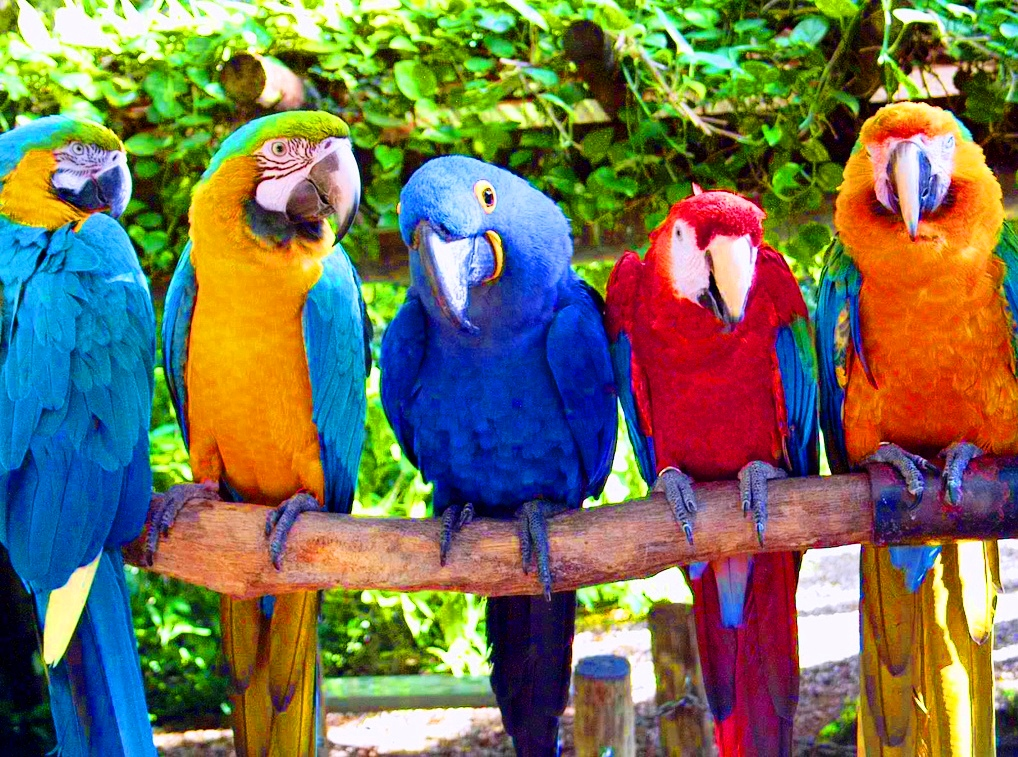

In [2]:
# Загружаем изображение
image_url2 = "../images/parrots.jpg"
image2 = Image.open(image_url2)
image2

In [3]:
from transformers import BitsAndBytesConfig

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True, # подгружаем сразу оптимальную версию
    bnb_4bit_compute_dtype=torch.float16
)

In [ ]:
# указываем тип задачи - image-to-text
model_id = "llava-hf/llava-1.5-7b-hf"

pipe = pipeline("image-to-text", model=model_id, model_kwargs={"quantization_config": quantization_config})

In [7]:
prompt = "USER: <image>\nHow much birds on the image?\nASSISTANT:"

outputs = pipe(image2, prompt=prompt, generate_kwargs={"max_new_tokens": 200})

In [8]:
print(outputs[0]["generated_text"])

USER:  
How much birds on the image?
ASSISTANT: There are five birds on the image.


<div class="alert alert-success">
    
Модель правильно определила, что на картинке 5 птиц.

# <center id="p6">😵‍💫 Лицензии - 🪪 </center>

<div class="alert alert-info">

Не все опенсорсные модели являются одинаково открытыми. Это зависит от типа лицензии, который выбирает разработчик. <br> 
Информация о лицензии обычно указывается в карточке модели.

<div class="alert alert-success">

Основное число LLM распространяется под типовыми лицензиями свободного ПО, среди которых можно выделить базовые:

* **[Apache 2.0](https://en.wikipedia.org/wiki/Apache_License)** позволяет использовать модели для любых целей, модифицировать их и распространять в соответствии с условиями лицензии, без отчисления платежей разработчику. Под этой лицензией создано подавляющее большинство открытых LLM: T5, Mistral 7B и другие.
* **[MIT License](https://en.wikipedia.org/wiki/MIT_License)** разработана Массачусетским технологическим институтом (MIT). Во многом совпадает с Apache 2.0, но допускает повторное использование опенсорсного кода в составе проприетарного ПО. Например, эта лицензия используется для модели Phi-2 от Microsoft.
* **[Open RAIL-M v1](https://huggingface.co/spaces/bigcode/bigcode-model-license-agreement)** поддерживается сообществом BigCode, созданным компанией Hugging Face. Лицензия предполагает свободный доступ к моделям, возможность модификации их исходного кода, и совместное использование LLM и их вариантов. Содержит ряд ограничений, связанных с запретом на использование в неэтичной или противоправной деятельности. Под этой лицензией распространяется модель BLOOM.
* **[CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/)** поддерживается международной некоммерческой организацией Creative Commons. Позволяет копировать и распространять LLM, модифицировать и дополнять их для любых целей, включая коммерческое использование. Но в последнем случае распространять новые модели следует по той же лицензии, что и оригинал. Под этой лицензией находится модель MPT-7B-Chat.
* **[BSD-3-Clause](https://en.wikipedia.org/wiki/BSD_licenses).** Лицензия свободного ПО с минимальными ограничениями на использование и распространение нейросеток. Допускает неограниченное копирование для любых целей при условии указания дисклеймеров об авторских правах и отказа от гарантийных обязательств. Используется редко. Нам удалось найти одну популярную LLM с подобной лицензией — CodeT5+.

<div class="alert alert-info">

В тегах к модели указан тип лицензии

<img src='../images/license_model.png' align="centr" width="720" height="578" >


<div class="alert alert-info">

Можно задать в фильтре показ моделей только с определенными типами лицензий:

<img src='../images/license_filter.png' align="center" width="720" height="478" >


<div class="alert alert-info">
    
* Модели, применение которых возможно с рядом существенных ограничений, относят к частично открытым. Например, создатели `LLaMA 2` предлагают пользователю перед скачиванием принять соглашение с обширным списком требований и запретов.
* Один из пунктов запрещает использовать нейросеть при количестве пользователей в проекте, превышающем 700 миллионов человек в месяц. И это не всё. Результаты работы `LLaMA 2` нельзя использовать для обучения других `LLM`, кроме самой `LLaMA` и её производных.

<div class="alert alert-info">

Выполнение следующей ячейки выдаст ошибку.
Перед тем как пользоваться моделью [Meta-Llama](https://huggingface.co/meta-llama/Meta-Llama-3-8B) нужно принять соглашение, оставить свои контактные данные, указать цель использования и ждать одобрения на пользование. 

In [2]:
model = AutoModelForCausalLM.from_pretrained("meta-llama/Meta-Llama-3-8B")
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3-8B")
gen = pipeline('text-generation', model=model, tokenizer=tokenizer, max_new_tokens=250,)

llm = HuggingFacePipeline(pipeline=gen)

/home/jovyan/venvs/sinara/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


OSError: You are trying to access a gated repo.
Make sure to have access to it at https://huggingface.co/meta-llama/Meta-Llama-3-8B.
403 Client Error. (Request ID: Root=1-666097ac-5d68a7f73f24f3664d5ad698;e30e93ad-867a-4541-a4e7-a0dcc59cff68)

Cannot access gated repo for url https://huggingface.co/meta-llama/Meta-Llama-3-8B/resolve/main/config.json.
Access to model meta-llama/Meta-Llama-3-8B is restricted and you are not in the authorized list. Visit https://huggingface.co/meta-llama/Meta-Llama-3-8B to ask for access.

<div class="alert alert-success">

Есть модели, в которых нужно просто принять лицензию. (Не нужно ждать одобрения от разработчиков модели).
При использовании таких моделей нужно будет подавать токен huggingface в параметры при инициализации модели. 

In [3]:
#model = AutoModelForCausalLM.from_pretrained("model", token='your_token')

# <center id="p7">✌🏼 Заключение 📤</center>


<div class="alert alert-info">

* В этом уроке решили не рассказывать про конкретные семейства моделей и особенности их архитектур.
  * base - претрейн отцы и матери 
  * chat - диалоговые модели
  * Instruct - затюненные под инструкции при обучении
  * code - с фокусом на код
* Модели выходят чуть ли не каждый день, поэтому рекомендовать конкретные модели не имеет смысла - завтра всё может поменяться. Следите за новостями в телеграм канале @big_llm_course

<div class="alert alert-success">
    
* Вместо этого мы разобрались с базовыми принципами выбора open-sourсe моделей взамен платных: 
  -  Как выбрать модель в зависимости от задачи
  -  Разобрали популярные бенчмарки 
  -  Как учесть ограничения по ресурсам (привет `float16` и `4-bit`)
  -  Предусмотреть язык модели (чтоб не использовать `gpt2` для русских текстов)
  -  Как выбрать модель для мультимодальных данных
  -  Что следует знать про лицензии для частного и коммерческого использования
* Посмотрели как использовать open-sourse модели с `LangChain`. 

<div class="alert alert-info">
    
**В следующем уроке разберём как сделать `finetune` модели на своих данных и кто такая Лора!**